## setup

In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Where to save the figures
from pathlib import Path

# 각자 알맞은 path를 지정(필수는 아님)
IMAGES_PATH = Path() / "training" / "NN"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


## data preparation

In [2]:
from pathlib import Path
print(IMAGES_PATH)

training\NN


In [3]:
from sklearn.datasets import fetch_openml

openml = fetch_openml('mnist_784', as_frame=False, parser="auto")
mnist = openml

my_data_num = np.load(Path() / "final_dataset" / "fixed_final_num.npz")
my_data_sym = np.load(Path() / "final_dataset" / "fixed_final_sym.npz")

In [4]:
# mnist dataset
X_mnist, y_mnist = mnist.data, mnist.target
print(X_mnist.shape, y_mnist.shape)

# our 0-9 dataset
X_myData_num, y_myData_num = my_data_num['img'], my_data_num['label']
print(X_myData_num.shape, y_myData_num.shape)

# our mathSym dataset
X_myData_sym, y_myData_sym = my_data_sym['img'], my_data_sym['label']
print(X_myData_sym.shape, y_myData_sym.shape)

(70000, 784) (70000,)
(1600, 784) (1600,)
(1600, 784) (1600,)


In [5]:
n = y_mnist[0]
n

'5'

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    # Show axis for now
    # plt.axis("off")

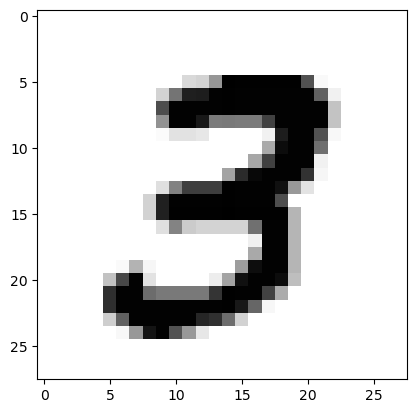

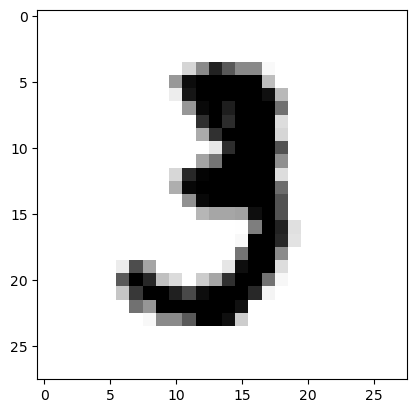

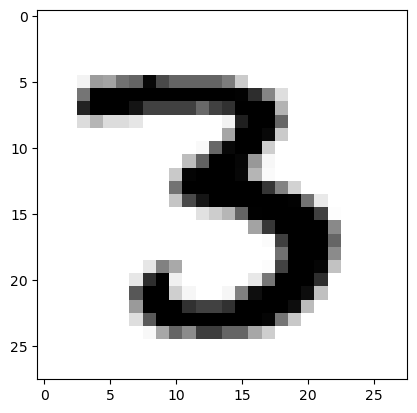

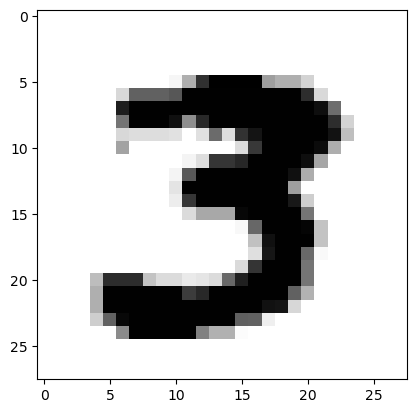

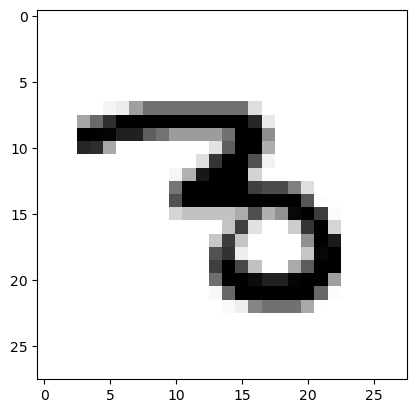

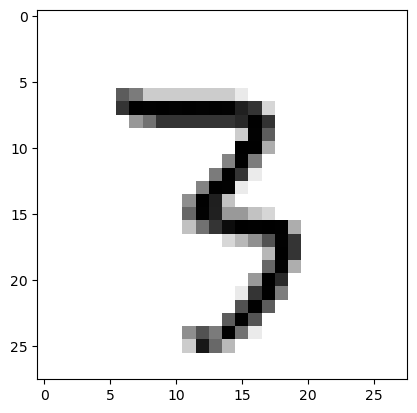

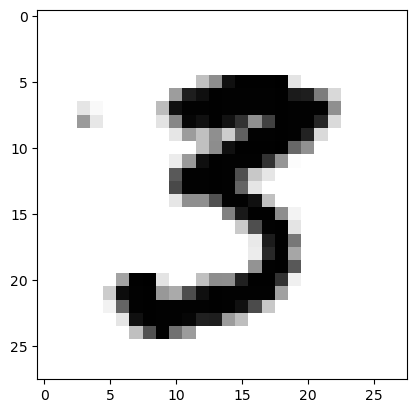

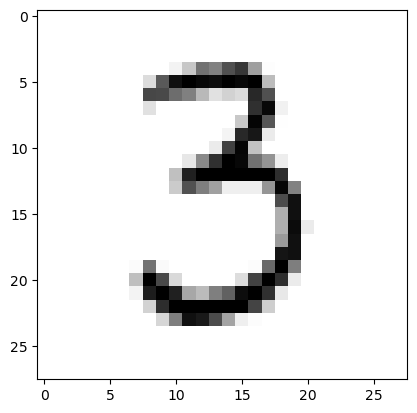

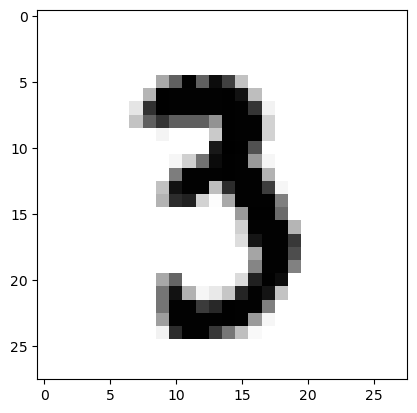

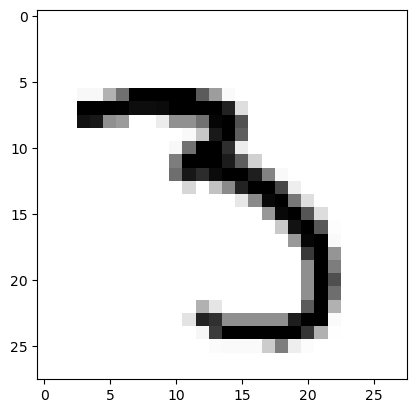

In [7]:
mnist_3 = X_mnist[y_mnist == '3']
for i in range(10):
    plot_digit(mnist_3[i])
    plt.show()

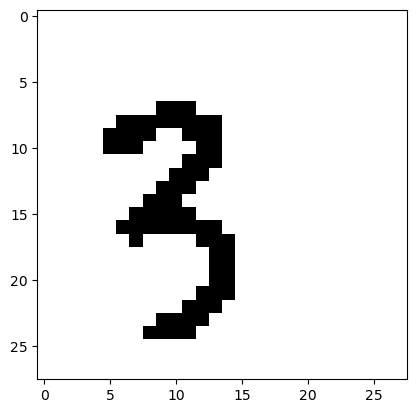

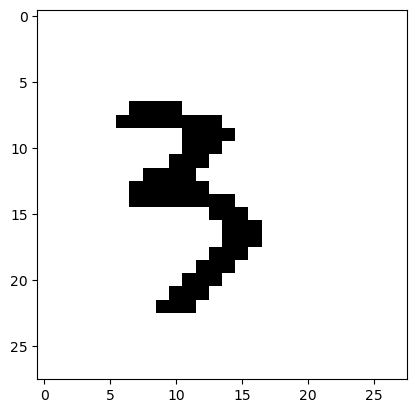

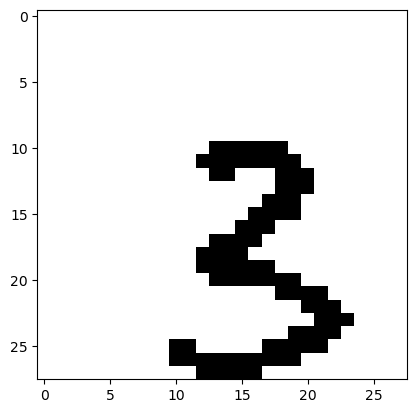

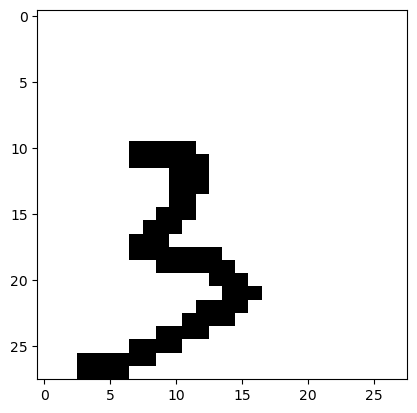

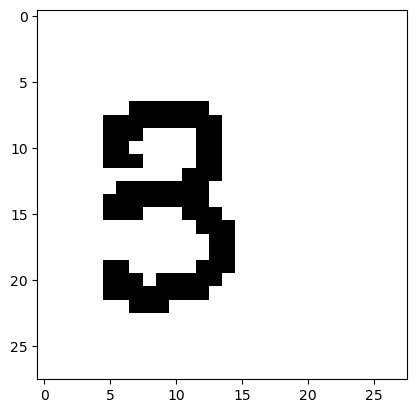

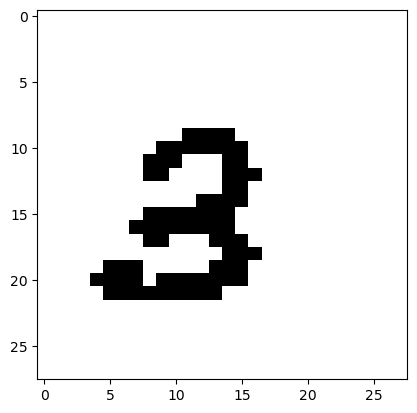

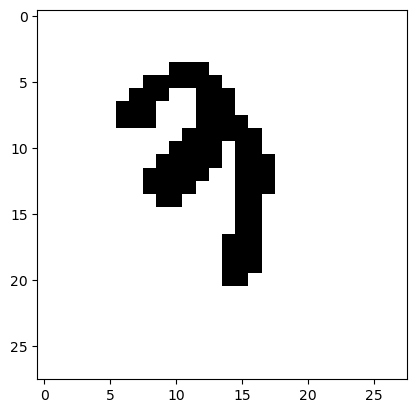

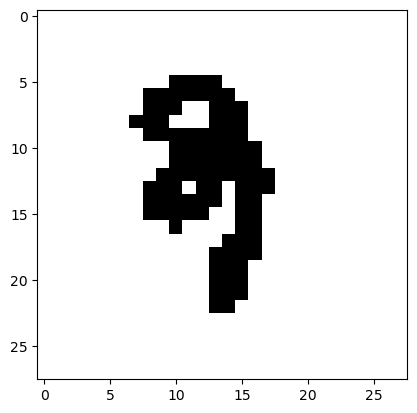

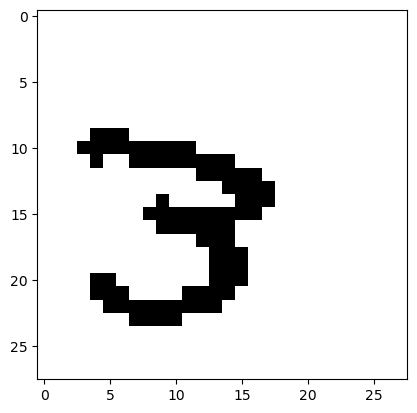

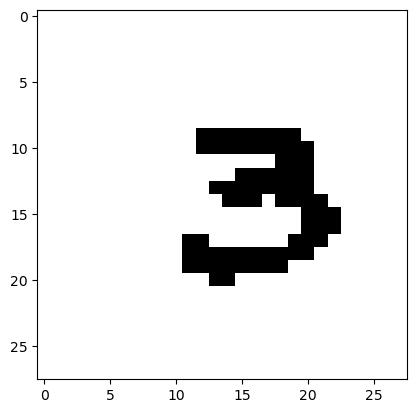

In [8]:
# our data label datatype is float, not string
my_data_3 = X_myData_num[y_myData_num == 3.]

for i in range(10):
    plot_digit(my_data_3[i])
    plt.show()

our data looks like this(0 or 1, float64)

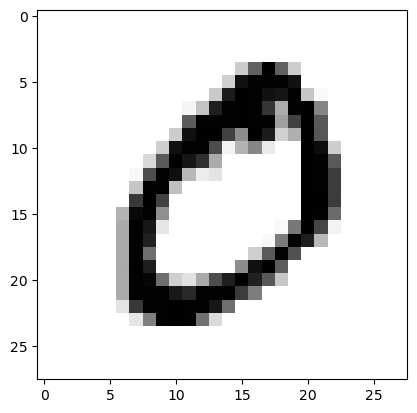

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

In [9]:
plot_digit(X_mnist[1])
plt.show()
print(X_mnist[1],X_mnist[1].dtype)

...on the other hand, mnist data looks like this(0-255, int64)

In [10]:
flag = False

for i in range(0,X_myData_num.shape[0]):
    if X_myData_num[i].dtype != "float64":
        flag = True
        break

print(flag)

False


if we check our data, every data is float64
so it is not a human error

In [11]:
test_data = np.ones((3,4,5),dtype="int64")
test_data

array([[[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]], dtype=int64)

In [12]:
test_data[test_data == 1] = 0
test_data

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]], dtype=int64)

In [13]:
def split_dataset(X,y,train_ratio=0.6, vali_ratio=0.2, test_ratio=0.2, random = 42):
    from sklearn.model_selection import train_test_split
    
    # use train_test_split twice to split into 3(train, test, validation)
    X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size=train_ratio, random_state=random)
    X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=vali_ratio/(vali_ratio+test_ratio), random_state=random)
    
    return X_train,y_train,X_val,y_val,X_test,y_test

In [14]:
# dataset을 3:1:1의 train validation test로 분할
X_mnist_train,y_mnist_train,X_mnist_val,y_mnist_val,X_mnist_test,y_mnist_test = split_dataset(X_mnist, y_mnist)

# 우리 dataset 같은 경우 cross-validation을 위해 train test로만 분할(데이터 수가 너무 적음)
train = 0.8

from sklearn.model_selection import train_test_split

X_myData_num_train, X_myData_num_test, y_myData_num_train, y_myData_num_test = train_test_split(X_myData_num,y_myData_num, train_size=train, random_state=42)

X_myData_sym_train, X_myData_sym_test, y_myData_sym_train, y_myData_sym_test = train_test_split(X_myData_sym,y_myData_sym, train_size=train, random_state=42)

In [15]:
print(X_mnist_train.shape,X_mnist_val.shape,X_mnist_test.shape)
print(X_myData_num_train.shape,X_myData_num_test.shape)
print(X_myData_sym_train.shape,X_myData_sym_test.shape)

(42000, 784) (14000, 784) (14000, 784)
(1280, 784) (320, 784)
(1280, 784) (320, 784)


## model training

In [16]:
from sklearn.neural_network import MLPClassifier

random = 42

# 먼저 random_state을 제외한 모든 hyperparameter를 default를 둔 채 fit
nn_clf = MLPClassifier(random_state=random).fit(X_mnist_train, y_mnist_train)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

random = 42

nn_my_clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=random))
nn_my_clf.fit(X_myData_num_train, y_myData_num_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(random_state=42))])

In [18]:
nn_clf.score(X_mnist_val, y_mnist_val)

0.9614285714285714

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(nn_my_clf, X_myData_num_train, y_myData_num_train, cv=3)

array([0.44496487, 0.51053864, 0.45539906])

In [20]:
nn_my_clf.score(X_myData_num_test,y_myData_num_test)

0.575

## === our data ===

now we have corrected and rebased data, we can run and check if it is worth it

In [23]:
path = Path() / "final_dataset"

In [25]:
our_num_trVal_cor = np.load(path / "digit_data_TrVal_corrected.npz")
our_num_trVal_reb = np.load(path / "digit_data_TrVal_rebased.npz")

our_sym_trVal_cor = np.load(path / "op_data_TrVal_corrected.npz")
our_sym_trVal_reb = np.load(path / "op_data_TrVal_rebased.npz")


In [36]:
our_num_trVal_cor["img"].shape

(14775, 28, 28)

In [ ]:
# def plot_multi(img, r, c):
#     image = im.reshape(28, 28)
#     plt.imshow(image, cmap="binary")
#     # Show axis for now
#     # plt.axis("off")
#     
#     fig, axs = plt.subplots(r,c)

In [34]:
# for i in range(30,50):
    # one = our_num_trVal_cor["img"]
    # one_label = our_num_trVal_cor["label"]
    # 
    # plot_digit(one[i])
    # plt.show()
    # print(one_label[i])
    
    # two = our_num_trVal_reb["img"]
    # two_label = our_num_trVal_reb["label"]
    # 
    # plot_digit(two[i])
    # plt.show()
    # print(two_label[i])
    
    # thr = our_sym_trVal_cor["img"]
    # thr_label = our_sym_trVal_cor["label"]
    # 
    # plot_digit(thr[i])
    # plt.show()
    # print(thr_label[i])
    
    # fou = our_sym_trVal_reb["img"]
    # fou_label = our_sym_trVal_reb["label"]
    # 
    # plot_digit(fou[i])
    # plt.show()
    # print(fou_label[i])

we can see some datasets are not labeled correctly; it could be a mistake during the correction and rebase
or it could be a wrong labeled at the beginning

check and visualizing should be done(later for now)

In [35]:
from sklearn.neural_network import MLPClassifier

random = 42

# 먼저 random_state을 제외한 모든 hyperparameter를 default를 둔 채 fit
nn_cor_clf = MLPClassifier(random_state=random).fit(our_num_trVal_cor["img"], our_num_trVal_cor["label"])

ValueError: Found array with dim 3. MLPClassifier expected <= 2.

In [ ]:
nn_reb_clf = MLPClassifier(random_state=random).fit(our_num_trVal_reb["img"], our_num_trVal_reb["label"])

## model validation(and improvement)

In [72]:
pred = np.asarray(nn_my_clf.predict(X_mnist_val))

from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_mnist_val, pred,labels=nn_clf.classes_)
cm

ValueError: Mix of label input types (string and number)

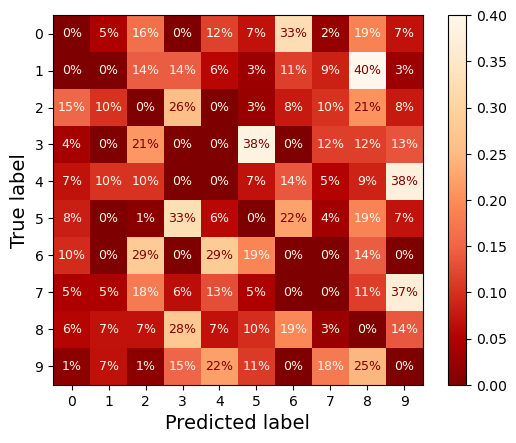

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_mnist_val, pred,sample_weight=(y_mnist_val != pred),normalize="true",values_format=".0%",cmap="OrRd_r")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    nn_clf, X_mnist, y_mnist,n_jobs=-1)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

In [ ]:

# 더 좋은 hyperparameter를 찾기 위해 gridsearch를 사용

from sklearn.model_selection import GridSearchCV

param_grid = []

grid_search = GridSearchCV(nn_clf)

## final test(train)

In [4]:
data_path = Path() / "final_dataset" / "mnist_num_20180624_최서호.npz"

data = np.load(data_path)

In [24]:
data['img'][0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0

In [21]:
data.files

['img', 'label']

In [22]:
mnist

AttributeError: files